In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [69]:
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [70]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [71]:
dataset.drop(['PassengerId','Ticket','Cabin','Embarked','Name'],axis = 1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
dataset["Age"].fillna(dataset.Age.mean(), inplace = True)

In [78]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Name']= label_encoder.fit_transform(dataset['Name'])
dataset['Name'].unique()

array([108, 190, 353, 272,  15, 554, 515, 624, 412, 576, 727,  95, 729,
        28, 840, 359, 682, 867, 839, 512, 273,  80, 523, 765, 626,  44,
       240, 260, 605, 813, 828, 776, 289, 856, 535, 372, 505, 134, 837,
       589,   7, 827, 446, 456, 212, 697, 473, 604, 726,  38, 629, 594,
       333, 246, 620, 873, 707, 595, 853, 299, 749, 385, 337, 755, 784,
       560, 596, 185,  25, 440, 396, 300, 376, 161,  87, 546, 778, 563,
       127, 223, 842, 737, 519, 141, 386,  52, 255, 764, 259, 149, 159,
        31, 150, 209, 184, 740, 292, 308, 219, 422, 656, 658, 858, 405,
       312, 542, 724, 559, 675, 552, 667, 882,  67, 417,  46, 645, 178,
       826,  70,  24, 362, 551, 575, 848, 857, 588, 525, 499, 653, 234,
       225, 165, 695, 851, 772, 685, 585, 271, 618, 282,  99, 597, 319,
       116,  32, 586,  29, 254, 580, 121,  68, 643, 532, 889, 612, 866,
       287, 181, 767, 716, 186, 847,  82, 129, 628, 293, 157, 760,  69,
       486, 832, 680, 408, 752, 769, 444, 464, 388, 320, 474, 71

In [79]:
dataset['Sex'].unique()

array([1, 0])

In [80]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Sex']= label_encoder.fit_transform(dataset['Sex'])
dataset['Sex'].unique()

array([1, 0], dtype=int64)

In [81]:
dataset['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [82]:
dataset.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
dataset.shape

(891, 12)

In [85]:
dataset.drop(['PassengerId','Ticket','Cabin','Embarked','Name'],axis = 1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [88]:
dataset["Age"].fillna(dataset.Age.mean(), inplace = True)

In [89]:
dataset["Fare"].fillna(dataset.Age.mean(), inplace = True)

In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 80.2+ KB


In [94]:
dataset.drop(['PassengerId','Ticket','Cabin','Embarked','Name'],axis = 1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Name'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

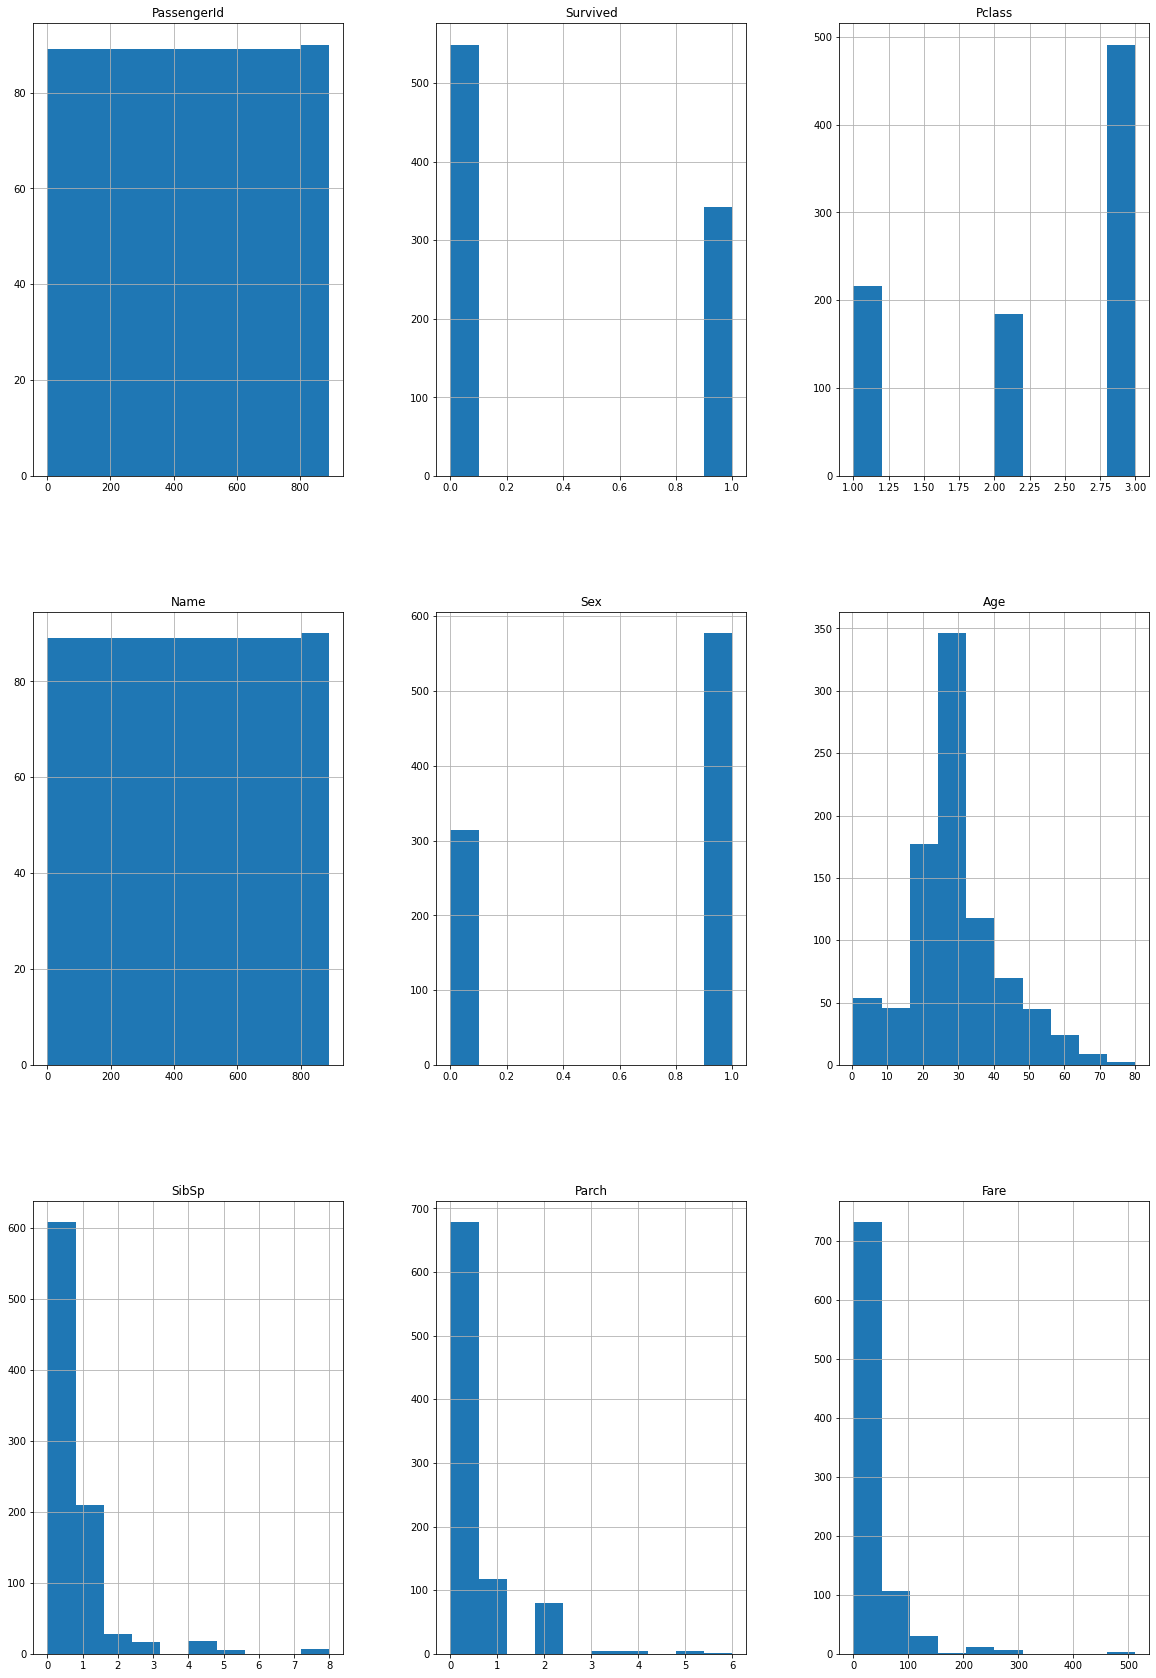

In [95]:
dataset.hist(figsize=(20,30))

C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANIL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

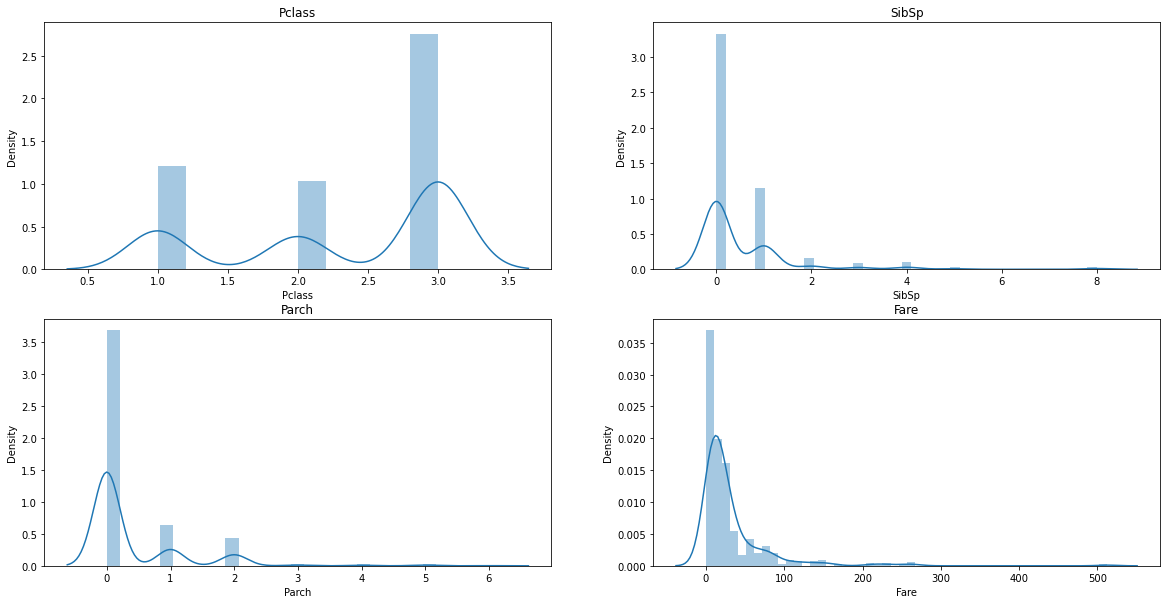

In [96]:
fig, ax = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(20)


sns.distplot(dataset['Pclass'], ax = ax[0,0])
sns.distplot(dataset['SibSp'], ax = ax[0,1])
sns.distplot(dataset['Parch'], ax = ax[1,0])
sns.distplot(dataset['Fare'], ax = ax[1,1])


ax[0,0].set_title('Pclass')
ax[0,1].set_title('SibSp')
ax[1,0].set_title('Parch')
ax[1,1].set_title('Fare')
plt.show()

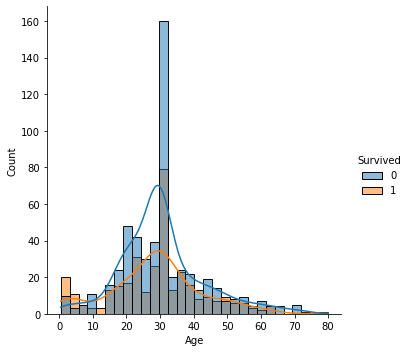

In [97]:
sns.displot(dataset, x="Age", hue="Survived", kde=True)

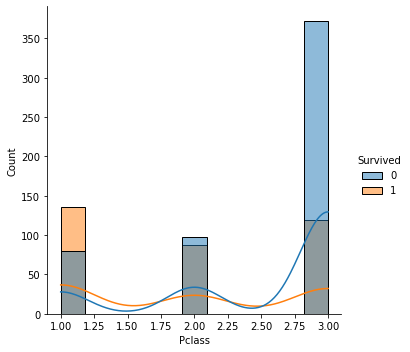

In [98]:
sns.displot(dataset, x="Pclass", hue="Survived", kde=True)

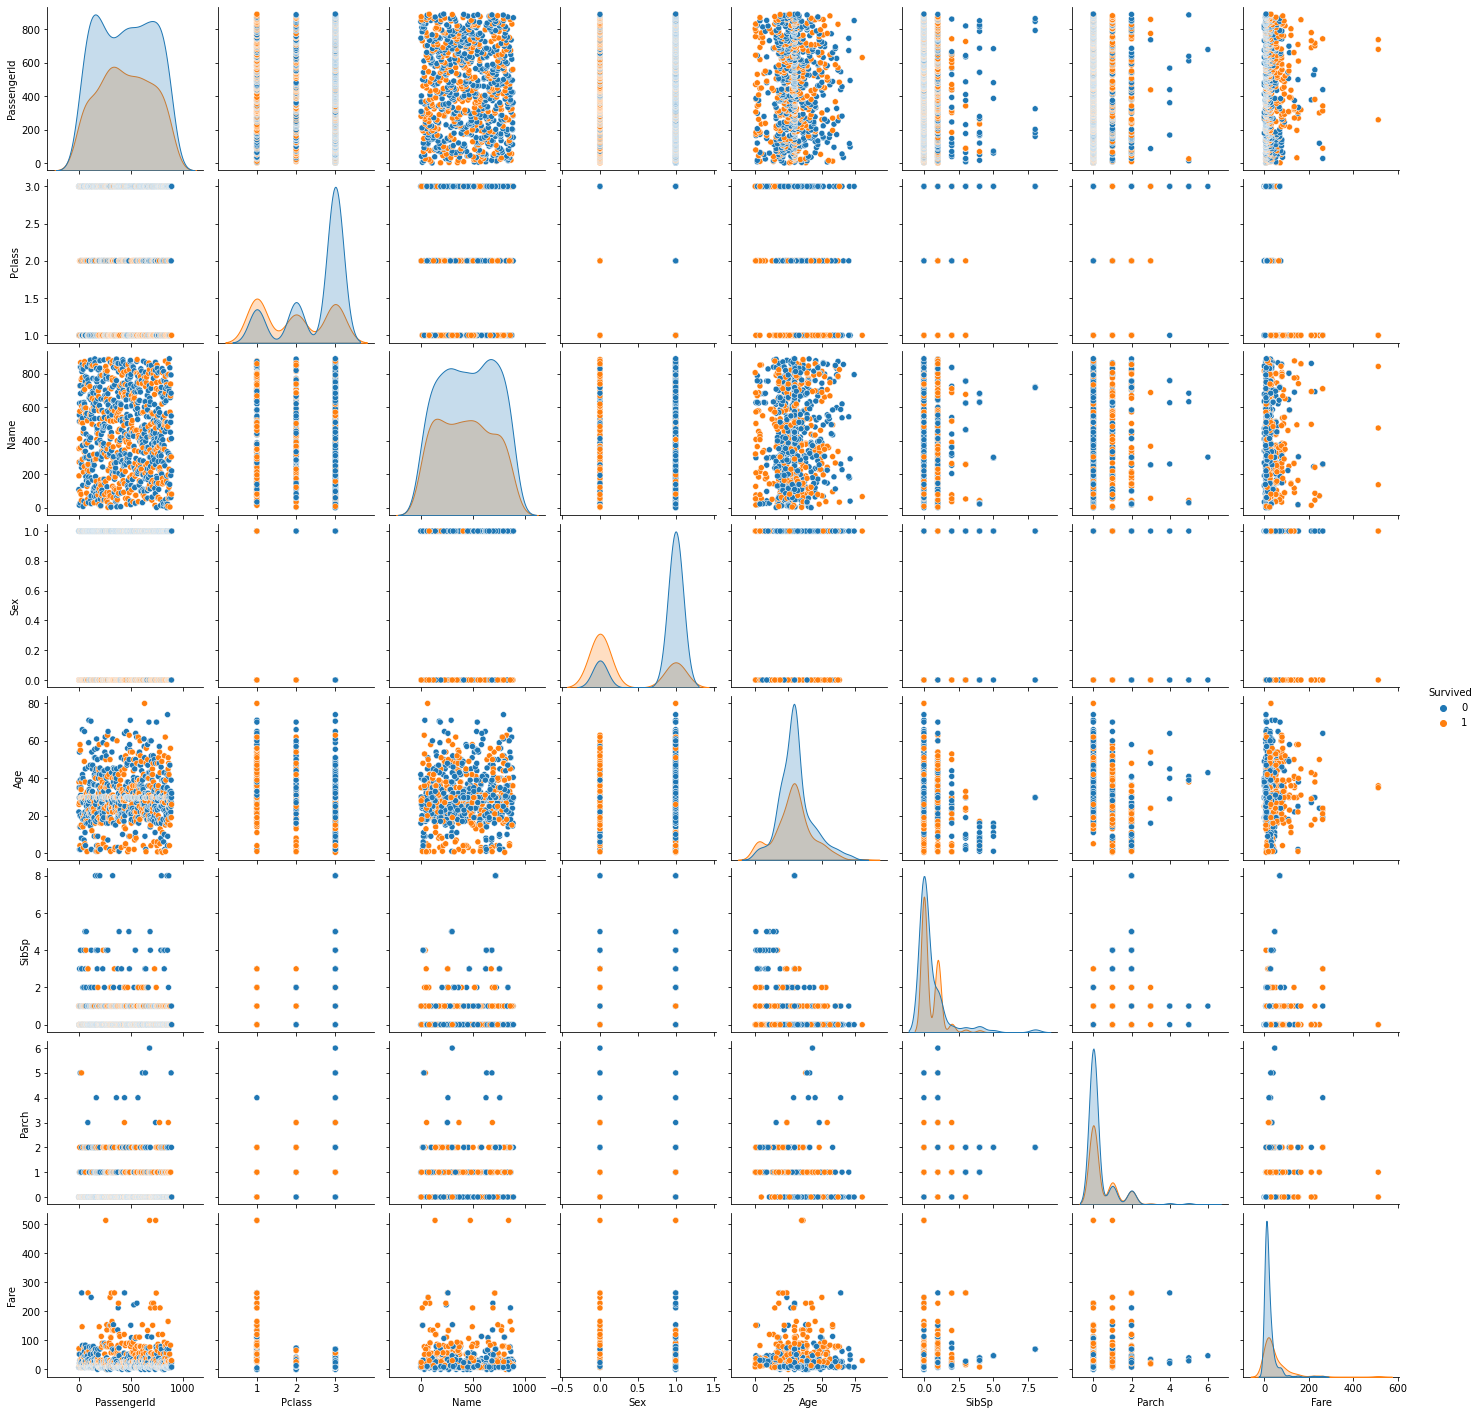

In [99]:
sns.pairplot(dataset, hue="Survived")

In [100]:
pd.crosstab(dataset['Sex'],dataset['Survived'])

Survived,0,1
Sex,,
0,81,233
1,468,109


In [101]:
dataset.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,-0.549500
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,-0.049173
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,0.033207,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,1.000000


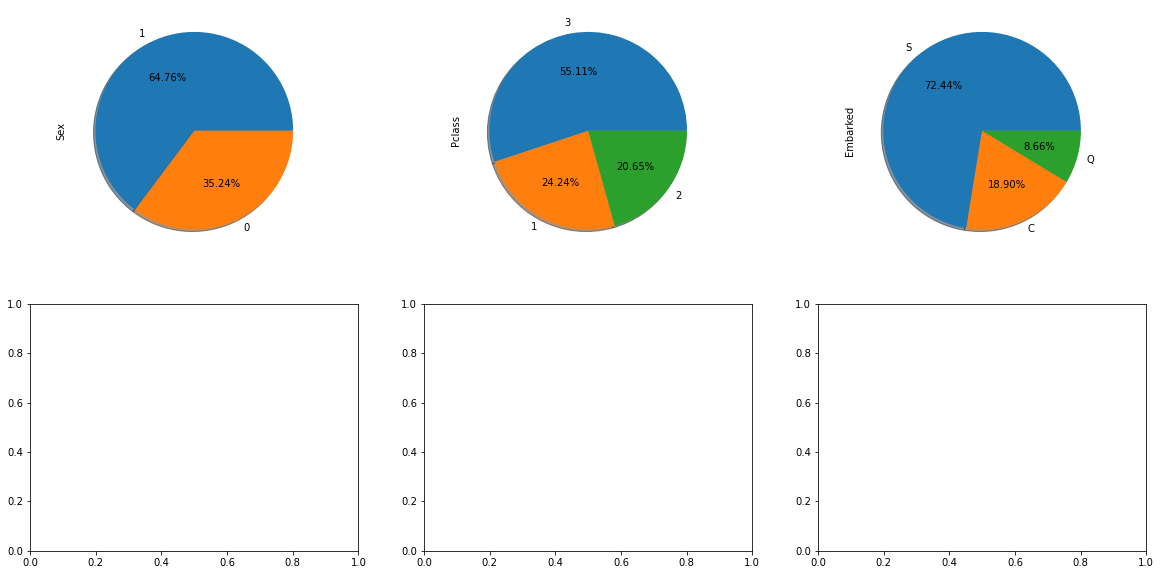

In [102]:
fig, ax = plt.subplots(2, 3)

fig.set_figheight(10)
fig.set_figwidth(20)

dataset['Sex'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True, ax = ax[0,0])
dataset['Pclass'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True, ax = ax[0,1])
dataset['Embarked'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True, ax = ax[0,2])

plt.show()

<AxesSubplot:ylabel='Survived'>

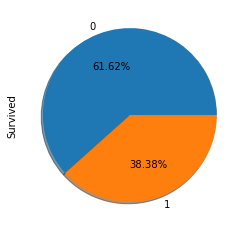

In [103]:
dataset['Survived'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)

In [104]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [106]:
print(X_train)

[[106 0 3 ... '349207' 7.8958 nan]
 [69 1 3 ... '3101281' 7.925 nan]
 [254 0 3 ... 'A/5. 3336' 16.1 nan]
 ...
 [630 0 3 ... '334912' 7.7333 nan]
 [560 1 3 ... '345572' 17.4 nan]
 [685 0 2 ... '29750' 39.0 nan]]


In [107]:
print(y_train)

['S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C'
 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S'
 'Q' 'S' 'C' 'C' 'S' 'Q' 'C' 'S' 'C' 'S' 'C' 'S' 'S' 'C' 'S' 'C' 'S' 'S'
 'S' 'Q' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S' 'Q' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'C' 'S' 'S' 'Q' 'S' 'S' 'C' 'S' 'S'
 'S' 'S' 'S' 'Q' 'S' 'C' 'S' 'C' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'C' 'S' 'Q' 'S' 'Q' 'S' 'S' 'C' 'S' 'S' 'S' 'Q' 'S' 'Q' 'S' 'S'
 'S' 'C' 'S' 'Q' 'S' 'Q' 'C' 'Q' 'S' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'C' 'C' 'C' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'Q' 'S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S'
 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S'
 'C' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S

In [108]:
print(X_test)

[[496 0 3 ... '2627' 14.4583 nan]
 [649 0 3 ... 'S.O./P.P. 751' 7.55 nan]
 [279 0 3 ... '382652' 29.125 nan]
 ...
 [380 0 3 ... '347069' 7.775 nan]
 [743 1 1 ... 'PC 17608' 262.375 'B57 B59 B63 B66']
 [11 1 3 ... 'PP 9549' 16.7 'G6']]


In [109]:
print(y_test)

['C' 'S' 'Q' 'C' 'C' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'Q' 'S' 'C' 'S' 'S' 'S'
 'S' 'C' 'S' 'S' 'Q' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'C'
 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S'
 'C' 'S' 'S' 'S' 'S' 'Q' 'C' 'S' 'C' 'C' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'S'
 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'C'
 'S' 'S' 'S' 'C' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'C'
 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'Q' 'S' 'Q'
 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'C' 'S' 'Q' 'C' 'S' 'C'
 'C' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'C' 'S' 'S' 'C'
 'S' 'C' 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'Q' 'C' 'S' 'S'
 'S' 'S' 'S' 'C' 'S' 'C' 'S' 'C' 'S' 'S' 'Q' 'S' 'S' 'C' 'S' 'C' 'S' 'S'
 'C' 'S' 'S' 'C' 'S' 'C' 'S']


In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'Mionoff, Mr. Stoytcho'

In [55]:
print(X_train)

[[106 0 3 ... '349207' 7.8958 nan]
 [69 1 3 ... '3101281' 7.925 nan]
 [254 0 3 ... 'A/5. 3336' 16.1 nan]
 ...
 [630 0 3 ... '334912' 7.7333 nan]
 [560 1 3 ... '345572' 17.4 nan]
 [685 0 2 ... '29750' 39.0 nan]]


In [56]:
print(X_test)

[[496 0 3 ... '2627' 14.4583 nan]
 [649 0 3 ... 'S.O./P.P. 751' 7.55 nan]
 [279 0 3 ... '382652' 29.125 nan]
 ...
 [380 0 3 ... '347069' 7.775 nan]
 [743 1 1 ... 'PC 17608' 262.375 'B57 B59 B63 B66']
 [11 1 3 ... 'PP 9549' 16.7 'G6']]


In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

ValueError: could not convert string to float: 'Mionoff, Mr. Stoytcho'

In [58]:
print(classifier.predict(sc.transform([[30,87000]])))

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [59]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [61]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [62]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.